In [92]:
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from PIL import Image

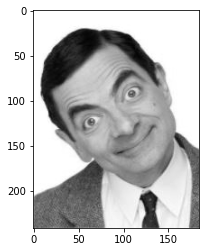

In [93]:
img = cv2.imread("mrbean_input.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(img , cmap="gray")

In [94]:
rows,cols = img.shape

for i in range(12000):
    noise = random.randint(100,220)
    random_position1 = random.randint(0 , rows-1)
    random_position2 = random.randint(0 , cols-1)
    img[random_position1,random_position2] = noise

cv2.imwrite('mrBean/noisey_effect.jpg' , img)

True

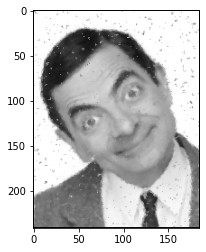

In [95]:
img = cv2.imread('mrBean/noisey_effect.jpg',0)

result = np.zeros(img.shape)

rows , cols = img.shape

for i in range (1,rows-1):
    for j in range(1,cols-1):
        small_img = img[i-1:i+2, j-1:j+2]
        small_img_1d = small_img.reshape(9)
        sorted_small_img_1d = np.sort(small_img_1d)
        result[i,j] = sorted_small_img_1d[4]
        
cv2.imwrite('mrBean/removeNoises.jpg' , result)
plt.imshow(result , cmap="gray")

In [96]:
img = plt.imread("mrbean_input.jpg" , 0)
face_detector = MTCNN()
def draw_facebox_and_keypoints(filename, result_list):
   
    data = plt.imread(filename)
    
    plt.imshow(data)
    
    ax = plt.gca()
   
    for result in result_list:
        
        x, y, width, height = result['box']
        
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
       
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
           
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            
    plt.show()


In [97]:
results = face_detector.detect_faces(img)

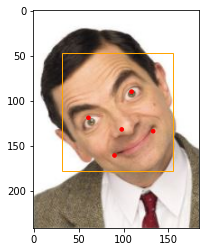

In [103]:
draw_facebox_and_keypoints("mrbean_input.jpg", results)

In [107]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [108]:
def alignment_procedure(img, left_eye, right_eye):

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    if b != 0 and c != 0: 
        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree
 
        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))
   
    return img 

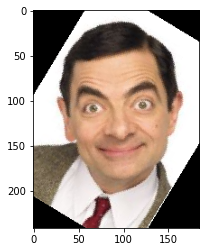

In [109]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)
plt.imshow(img)
